# TITANIC - deeper analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\train.csv'
test_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\Titanic\test.csv'

titanic_train = pd.read_csv(train_path, index_col='PassengerId')
titanic_test = pd.read_csv(test_path, index_col='PassengerId')

In [4]:
#looking at train data
print(titanic_train.info())
print(titanic_train.describe())
print(titanic_train.columns)
print(titanic_train.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      

In [5]:
titanic_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
print(titanic_train.groupby(['Embarked', 'Pclass']).Survived.value_counts())
print(titanic_train.groupby(['Embarked']).Survived.mean()) #Survival mean by Embarked

Embarked  Pclass  Survived
C         1       1            59
                  0            26
          2       1             9
                  0             8
          3       0            41
                  1            25
Q         1       0             1
                  1             1
          2       1             2
                  0             1
          3       0            45
                  1            27
S         1       1            74
                  0            53
          2       0            88
                  1            76
          3       0           286
                  1            67
Name: Survived, dtype: int64
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [7]:
print(list(titanic_train[titanic_train.Embarked.isnull()].index.values)) #indexes with NaN in Embarkeed column
titanic_train[titanic_train.Embarked.isnull()]

[62, 830]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
age_column_train = pd.DataFrame(titanic_train.Age)
age_column_train.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


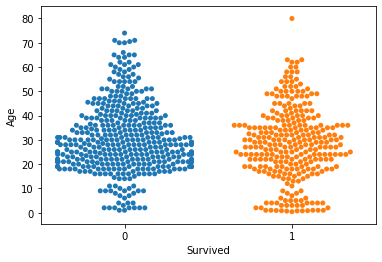

In [9]:
sns.swarmplot(x=titanic_train.Survived, y=titanic_train.Age)

In [10]:
titanic_train[titanic_train.Age.isnull()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [11]:
features = ['Pclass', 'Age', 'Sex', 'SibSp','Parch']

tit_converted_features = pd.get_dummies(titanic_train[features])


cross_val_score(DummyClassifier(), tit_converted_features, titanic_train.Survived, cv=3)

array([0.53198653, 0.4983165 , 0.52861953])

In [12]:
features2 = ['Pclass', 'Age', 'Sex', 'SibSp','Parch', 'Survived']
features3 = ['Pclass', 'Age', 'Sex_female','Sex_male', 'SibSp','Parch']
new_tit_train = titanic_train[features2].dropna(how='any')

new_tit_train = pd.get_dummies(new_tit_train)

new_tit_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Survived', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [13]:
cross_val_score(LogisticRegression(), new_tit_train[features3], new_tit_train.Survived)

array([0.79916318, 0.78151261, 0.78481013])

In [14]:
cross_val_score(RandomForestClassifier(), new_tit_train[features3], new_tit_train.Survived)

array([0.74476987, 0.80672269, 0.76371308])

In [15]:
cross_val_score(KNeighborsClassifier(), new_tit_train[features3], new_tit_train.Survived)

array([0.75732218, 0.80252101, 0.81012658])

In [16]:
dic_of_scores = {}

for i in range(1,31,4):
    scores = list(cross_val_score(KNeighborsClassifier(n_neighbors=i), new_tit_train[features3], new_tit_train.Survived))
    dic_of_scores[i] = scores

## 1. Data cleaning

#### We will try to get Mr./Mrs. from the names column

In [17]:
df = titanic_train.copy() #creating copy of original data

In [18]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [20]:
df_names_separ = df.Name.str.split(' ') #splitting each row of Names into list of strings

In [21]:
df_names_separ[2] # 2. row

['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)']

In [22]:
df.Name =df_names_separ.apply(lambda x:x[1]) # taking second string of the list, and removing all others
print(df.Name.head(10)) 

df.Name.value_counts()

PassengerId
1         Mr.
2        Mrs.
3       Miss.
4        Mrs.
5         Mr.
6         Mr.
7         Mr.
8     Master.
9        Mrs.
10       Mrs.
Name: Name, dtype: object


Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Planke,           3
Impe,             3
Major.            2
Col.              2
Gordon,           2
Mlle.             2
Cruyssen,         1
Don.              1
Billiard,         1
Capt.             1
Shawah,           1
Ms.               1
Velde,            1
Jonkheer.         1
Mulder,           1
Pelsmaeker,       1
Messemaeker,      1
Steen,            1
der               1
Walle,            1
Carlo,            1
the               1
Melkebeke,        1
Mme.              1
Name: Name, dtype: int64

In [23]:
df.Name.value_counts().index # taking all the first string from Names

Index(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'y', 'Planke,',
       'Impe,', 'Major.', 'Col.', 'Gordon,', 'Mlle.', 'Cruyssen,', 'Don.',
       'Billiard,', 'Capt.', 'Shawah,', 'Ms.', 'Velde,', 'Jonkheer.',
       'Mulder,', 'Pelsmaeker,', 'Messemaeker,', 'Steen,', 'der', 'Walle,',
       'Carlo,', 'the', 'Melkebeke,', 'Mme.'],
      dtype='object')

In [24]:
titles = list(df.Name.value_counts().index)
titles.remove('Mr.')
titles.remove('Mrs.')
titles.remove('Miss.')

df.Name.replace(titles, 'others', inplace=True) #replacing the list of first names with 'others' if not Mrs. or Mr. or Miss.

In [25]:
df.Name.value_counts()

Mr.       502
Miss.     179
Mrs.      121
others     89
Name: Name, dtype: int64

In [26]:
df.head(10) # that is the DF after replacing Nmaes with titles

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs.,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr.,male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,Mr.,male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,Mr.,male,54.0,0,0,17463,51.8625,E46,S
8,0,3,others,male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,Mrs.,female,27.0,0,2,347742,11.1333,NaN,S


In [27]:
df.groupby(['Survived']).Sex.value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

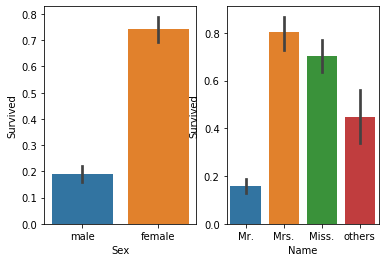

In [28]:
plt.subplot2grid((1,2), (0,0))
sns.barplot(data=df, x='Sex', y='Survived')

plt.subplot2grid((1,2),(0,1))
sns.barplot(data=df, x='Name', y='Survived')

####  Now changes in Age 

In [29]:
df.Age.isnull().sum() #177 missing values

177

In [30]:
df.Age = df.Age.fillna(df.Age.median()) #we replaced NaN with median 

In [31]:
df.Age = pd.cut(df.Age, 5) #we change numerical values to 5 categories
df.Age.head()

PassengerId
1    (16.336, 32.252]
2    (32.252, 48.168]
3    (16.336, 32.252]
4    (32.252, 48.168]
5    (32.252, 48.168]
Name: Age, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [32]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr.,male,"(16.336, 32.252]",1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs.,female,"(32.252, 48.168]",1,0,PC 17599,71.2833,C85,C
3,1,3,Miss.,female,"(16.336, 32.252]",0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs.,female,"(32.252, 48.168]",1,0,113803,53.1000,C123,S
5,0,3,Mr.,male,"(32.252, 48.168]",0,0,373450,8.0500,NaN,S
6,0,3,Mr.,male,"(16.336, 32.252]",0,0,330877,8.4583,NaN,Q
7,0,1,Mr.,male,"(48.168, 64.084]",0,0,17463,51.8625,E46,S
8,0,3,others,male,"(0.34, 16.336]",3,1,349909,21.0750,NaN,S
9,1,3,Mrs.,female,"(16.336, 32.252]",0,2,347742,11.1333,NaN,S


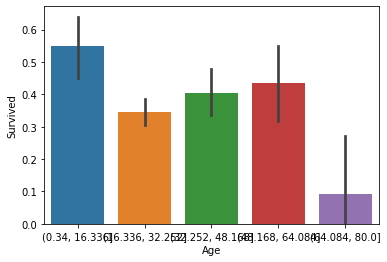

In [33]:
sns.barplot(data=df, x='Age',y='Survived')

#### Now SibSp and Parch (Parents and Children)


In [34]:
df['Family']=df.SibSp + df.Parch

In [35]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

#### Now Tickets

In [36]:
df.drop(['Ticket'], axis=1, inplace=True)

#### Fare, Cabin, Embarked

In [37]:
df.Fare.isnull().sum() #Fare does not contain NaN

0

In [38]:
df.Fare = pd.cut(df.Fare, 5) #splitting fare to 5 groups instead of numerical nubers

In [39]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,Mr.,male,"(16.336, 32.252]","(-0.512, 102.466]",NaN,S,1
2,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C85,C,1
3,1,3,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",NaN,S,0
4,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C123,S,1
5,0,3,Mr.,male,"(32.252, 48.168]","(-0.512, 102.466]",NaN,S,0


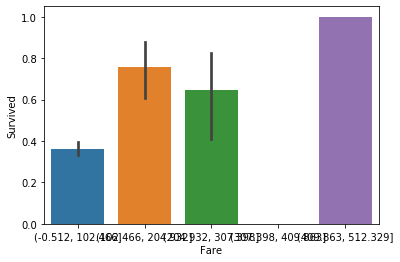

In [40]:
sns.barplot(data=df, x='Fare', y='Survived')

In [41]:
df.Cabin.isnull().sum() #687 empty data

687

In [42]:
df.Cabin.fillna('N', inplace=True)

In [43]:
df.Cabin = df.Cabin.str.split('')
df.Cabin = df.Cabin.apply(lambda x: x[1]) #take the second str from splitted row 

In [44]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,Mr.,male,"(16.336, 32.252]","(-0.512, 102.466]",N,S,1
2,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,C,1
3,1,3,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",N,S,0
4,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,S,1
5,0,3,Mr.,male,"(32.252, 48.168]","(-0.512, 102.466]",N,S,0


#### Embarked 

In [45]:
df.Embarked.isnull().sum()
df.Embarked.fillna('S', inplace=True) #data is filled with S instead of NaN

In [46]:
df.Embarked.isnull().sum()

0

In [47]:
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,Mr.,male,"(16.336, 32.252]","(-0.512, 102.466]",N,S,1
2,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,C,1
3,1,3,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",N,S,0
4,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,S,1
5,0,3,Mr.,male,"(32.252, 48.168]","(-0.512, 102.466]",N,S,0


#### Getting dummies instead of male/female, MR/MRS/MISS ...


In [48]:
clean_titanic = pd.get_dummies(df)
clean_titanic.head()

,Survived,Pclass,Family,Name_Miss.,Name_Mr.,Name_Mrs.,Name_others,Sex_female,Sex_male,"Age_(0.34, 16.336]",...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,3,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,1,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0,3,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1


In [49]:
features = list(clean_titanic.columns)
features.remove('Survived')
features

['Pclass',
 'Family',
 'Name_Miss.',
 'Name_Mr.',
 'Name_Mrs.',
 'Name_others',
 'Sex_female',
 'Sex_male',
 'Age_(0.34, 16.336]',
 'Age_(16.336, 32.252]',
 'Age_(32.252, 48.168]',
 'Age_(48.168, 64.084]',
 'Age_(64.084, 80.0]',
 'Fare_(-0.512, 102.466]',
 'Fare_(102.466, 204.932]',
 'Fare_(204.932, 307.398]',
 'Fare_(307.398, 409.863]',
 'Fare_(409.863, 512.329]',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_N',
 'Cabin_T',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [50]:
cross_val_score(RandomForestClassifier(), clean_titanic[features], clean_titanic['Survived'])

array([0.80808081, 0.83164983, 0.81818182])

#### Different way to get dummies without creating so many new columns

In [51]:
from sklearn import preprocessing

def labels_encod(df_t):
    Features = ['Name', 'Sex','Age','Fare','Cabin','Embarked']
  #  d = pd.concat([df_t[Features], df_ts[Features]]) #we connect train and test data 
    
    for F in Features:
        le = preprocessing.LabelEncoder() #instead of categories it assigns numbers example: male:1, female:0
        le = le.fit(df_t[F]) #we fit preprocessed  
        df_t[F]=le.transform(df_t[F])
        
    return df_t

testing_site_data = df.copy()
testing_site_data = labels_encod(testing_site_data)
testing_site_data.head()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,
1,0,3,1,1,1,0,7,2,1
2,1,1,2,0,2,0,2,0,1
3,1,3,0,0,1,0,7,2,0
4,1,1,2,0,2,0,2,2,1
5,0,3,1,1,2,0,7,2,0


In [52]:
features2 = list(testing_site_data.columns)
features2.remove('Survived')
features2

['Pclass', 'Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family']

In [53]:
cross_val_score(RandomForestClassifier(), testing_site_data[features2], testing_site_data.Survived)

array([0.78451178, 0.8047138 , 0.82491582])

## Insurance data set

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [55]:
insurance_path = r'C:\Users\Jędrzej\OneDrive\Pulpit\Zbiorczy\data analysis Udacity\insurance.csv'
insurance = pd.read_csv(insurance_path)

In [56]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [57]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [58]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


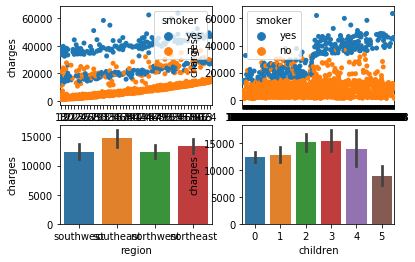

In [60]:
plt.subplot2grid((2,2),(0,0))
sns.swarmplot(data=insurance, x='age', y='charges', hue='smoker')

plt.subplot2grid((2,2),(0,1))
sns.swarmplot(data=insurance, x='bmi', y='charges', hue='smoker')

plt.subplot2grid((2,2),(1,0))
sns.barplot(data=insurance, x='region', y='charges')

plt.subplot2grid((2,2),(1,1))
sns.barplot(data=insurance, x='children', y='charges')

In [61]:
insurance.groupby(['sex']).charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [62]:
insurance_c = insurance.copy() #creating deepcopy

In [63]:
def data_segment(df, n):  #segmentation of regression data
    df = pd.cut(df, n)
    return df

In [64]:
insurance_c.charges = data_segment(insurance_c.charges, 10)

In [65]:
insurance_c.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,"(13651.585, 19916.44]"
1,18,male,33.770,1,no,southeast,"(1059.225, 7386.729]"
2,28,male,33.000,3,no,southeast,"(1059.225, 7386.729]"
3,33,male,22.705,0,no,northwest,"(19916.44, 26181.296]"
4,32,male,28.880,0,no,northwest,"(1059.225, 7386.729]"


In [66]:
def data_encoder(df):  # transforming categorical data to sets like: smoker-1, non-smoker 0...
    features = list(df.columns)
    
    for f in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[f])
        df[f] = le.transform(df[f])
        
    return df
    
insurance_c = data_encoder(insurance_c)
insurance_c.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,2
1,0,1,350,1,0,2,0
2,10,1,331,3,0,2,0
3,15,1,73,0,0,1,3
4,14,1,223,0,0,1,0


In [67]:
insurance_c.charges.value_counts()

0    536
1    398
2    129
3     86
5     59
6     57
4     35
7     32
9      4
8      2
Name: charges, dtype: int64

In [68]:
insurance_c.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,197,0,1,3,2
1,0,1,350,1,0,2,0
2,10,1,331,3,0,2,0
3,15,1,73,0,0,1,3
4,14,1,223,0,0,1,0


In [69]:
features = list(insurance_c.columns)
features.remove('charges')
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(insurance_c[features], insurance_c[['charges']])

In [70]:
rfc_cat = RandomForestClassifier()
rfc_cat.fit(X_train_cat, y_train_cat)
rfc_cat.score(X_test_cat, y_test_cat)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.844776119402985

In [71]:
insurance_c.charges.value_counts()

0    536
1    398
2    129
3     86
5     59
6     57
4     35
7     32
9      4
8      2
Name: charges, dtype: int64

In [72]:
dummy_y_test =y_test_cat.copy()
dummy_y_test['dummy_charges'] = 0
dummy_y_test['predicted'] = rfc_cat.predict(X_test_cat)
dummy_y_test['yesno']=0

In [73]:
for i in list(dummy_y_test.index):
    if dummy_y_test.loc[i, 'dummy_charges']==dummy_y_test.loc[i, 'charges']:
        dummy_y_test.loc[i, 'yesno']=1
        
dummy_y_test.yesno.sum()/dummy_y_test.index.value_counts().sum() # dummy classifier score

0.3850746268656716

In [74]:
dummy_model = DummyClassifier(strategy='most_frequent') #dummy classifier ready to use
dummy_model.fit(X_train_cat, y_train_cat)
dummy_model.score(X_test_cat, y_test_cat)

0.3850746268656716

In [75]:
def label_encoder(df):
    features = list(df.columns)
    
    for f in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[f])
        df[f] = le.transform(df[f])
    return df

insurance_c2 = insurance.copy()

insurance_c2[['sex','smoker', 'region']] = label_encoder(insurance_c2[['sex','smoker', 'region']])
insurance_c2.bmi = insurance_c2.bmi.astype(dtype = 'int64')
insurance_c2.charges = insurance_c2.charges.astype(dtype = 'int64')

insurance_c2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,16884
1,18,1,33,1,0,2,1725
2,28,1,33,3,0,2,4449
3,33,1,22,0,0,1,21984
4,32,1,28,0,0,1,3866


In [76]:
insurance_c2.charges = data_segment(insurance_c2.charges, 10)

insurance_c2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,"(13650.8, 19915.7]"
1,18,1,33,1,0,2,"(1058.351, 7385.9]"
2,28,1,33,3,0,2,"(1058.351, 7385.9]"
3,33,1,22,0,0,1,"(19915.7, 26180.6]"
4,32,1,28,0,0,1,"(1058.351, 7385.9]"


In [77]:
insurance_c2['charges'] = label_encoder(insurance_c2[['charges']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [78]:
insurance_c2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,2
1,18,1,33,1,0,2,0
2,28,1,33,3,0,2,0
3,33,1,22,0,0,1,3
4,32,1,28,0,0,1,0


In [79]:
X_train_neo, X_test_neo, y_train_neo, y_test_neo = train_test_split(insurance_c2[features], insurance_c2[['charges']])

In [80]:
rfc_neo = RandomForestClassifier()
rfc_neo.fit(X_train_neo, y_train_neo)
rfc_neo.score(X_test_neo, y_test_neo)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8567164179104477

In [81]:
insurance_c2['bmi'] = label_encoder(insurance_c2[['bmi']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [82]:
insurance_c2['age'] = label_encoder(insurance_c2[['age']])
insurance_c2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,sex,bmi,children,smoker,region,charges
0,1,0,12,0,1,3,2
1,0,1,18,1,0,2,0
2,10,1,18,3,0,2,0
3,15,1,7,0,0,1,3
4,14,1,13,0,0,1,0


In [83]:
X_train_neo2, X_test_neo2, y_train_neo2, y_test_neo2 = train_test_split(insurance_c2[features], insurance_c2['charges'])

In [84]:
rfc_neo2 = RandomForestClassifier()
rfc_neo2.fit(X_train_neo2, y_train_neo2)
rfc_neo2.score(X_test_neo2, y_test_neo2)

0.8477611940298507

In [85]:
insurance_c2[features].head()

,age,sex,bmi,children,smoker,region
0,1,0,12,0,1,3
1,0,1,18,1,0,2
2,10,1,18,3,0,2
3,15,1,7,0,0,1
4,14,1,13,0,0,1


In [86]:
smoking = insurance.copy()

In [87]:
smoking.sex = data_encoder(smoking[['sex']])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [88]:
smoking[['smoker', 'region']] = data_encoder(smoking[['smoker','region']])
smoking.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [89]:
smoking[['bmi','charges']] = smoking[['bmi','charges']].astype(dtype='int64')
smoking.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27,0,1,3,16884
1,18,1,33,1,0,2,1725
2,28,1,33,3,0,2,4449
3,33,1,22,0,0,1,21984
4,32,1,28,0,0,1,3866


In [90]:
smok_features = list(smoking.columns)
smok_features.remove('smoker')

cross_val_score(RandomForestClassifier(), smoking[smok_features], smoking.smoker)

array([0.94630872, 0.96636771, 0.9505618 ])

In [91]:
X_tr_smoke, X_ts_smoke, y_tr_smoke,y_ts_smoke = train_test_split(smoking[smok_features], smoking.smoker)

In [92]:
smoke_model = RandomForestClassifier()
smoke_model.fit(X_tr_smoke, y_tr_smoke)
prediction_smoke = smoke_model.predict(X_ts_smoke)

confusion_matrix(y_ts_smoke, prediction_smoke)

array([[256,  10],
       [  2,  67]], dtype=int64)

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [94]:
Log_Roc_auc = roc_auc_score(y_ts_smoke, smoke_model.predict(X_ts_smoke))
fpr, tpr, treshhold = roc_curve(y_ts_smoke, smoke_model.predict_proba(X_ts_smoke)[:,1])

In [95]:
fpr

array([0.        , 0.        , 0.0075188 , 0.01879699, 0.01879699,
       0.03759398, 0.04135338, 0.05639098, 0.06766917, 0.08270677,
       0.11654135, 1.        ])

In [96]:
tpr

array([0.        , 0.31884058, 0.55072464, 0.82608696, 0.85507246,
       0.97101449, 0.98550725, 0.98550725, 1.        , 1.        ,
       1.        , 1.        ])

In [97]:
treshhold

array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

Text(0.5, 1.0, 'ROC curve with auc counted')

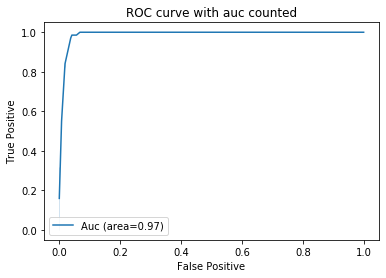

In [98]:
plt.figure()
sns.lineplot(x=fpr, y=tpr, label='Auc (area=%0.2f)' % Log_Roc_auc )
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve with auc counted')

# GRID SEARCH cross validation

### Choosing one best parameter

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [100]:
tab = [i for i in range(1,22,2)]

params = dict(n_neighbors = tab)
params

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}

In [101]:
grid = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy', return_train_score=False )

In [102]:
grid.fit(X_tr_smoke, y_tr_smoke)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                         21]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [103]:
grid_scores_df = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
grid_scores_df

,mean_test_score,std_test_score,params
0,0.916251,0.021254,{'n_neighbors': 1}
1,0.920239,0.022592,{'n_neighbors': 3}
2,0.929212,0.025316,{'n_neighbors': 5}
3,0.924227,0.022803,{'n_neighbors': 7}
4,0.927218,0.018425,{'n_neighbors': 9}
5,0.928215,0.018204,{'n_neighbors': 11}
6,0.926221,0.017827,{'n_neighbors': 13}
7,0.924227,0.018562,{'n_neighbors': 15}
8,0.925224,0.016927,{'n_neighbors': 17}
9,0.924227,0.018459,{'n_neighbors': 19}


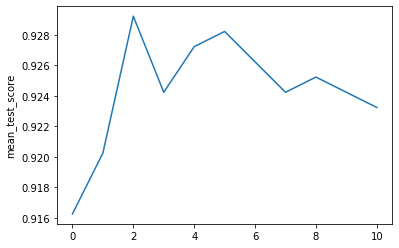

In [104]:
sns.lineplot(x=grid_scores_df.index, y=grid_scores_df.mean_test_score)

In [105]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9292123629112662
{'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


### Choosing multiple best parameters

In [106]:
weights_options =['uniform','distance']
k_range = [i for i in range(1,21,2)]

In [107]:
multiple_params = dict(n_neighbors=k_range, weights= weights_options)
print(multiple_params)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']}


In [108]:
multiple_grid = GridSearchCV(KNeighborsClassifier(), multiple_params, cv=10, scoring='accuracy', return_train_score=False)

In [109]:
multiple_grid.fit(X_train_cat, y_train_cat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [110]:
pd.DataFrame(multiple_grid.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.496510,0.031966,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.496510,0.031966,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.599202,0.039769,"{'n_neighbors': 3, 'weights': 'uniform'}"
3,0.548355,0.036075,"{'n_neighbors': 3, 'weights': 'distance'}"
4,0.606181,0.031609,"{'n_neighbors': 5, 'weights': 'uniform'}"
5,0.589232,0.039411,"{'n_neighbors': 5, 'weights': 'distance'}"
6,0.611167,0.031717,"{'n_neighbors': 7, 'weights': 'uniform'}"
7,0.599202,0.033794,"{'n_neighbors': 7, 'weights': 'distance'}"
8,0.632104,0.031059,"{'n_neighbors': 9, 'weights': 'uniform'}"
9,0.617149,0.032033,"{'n_neighbors': 9, 'weights': 'distance'}"


In [111]:
print(multiple_grid.best_score_)
print(multiple_grid.best_params_)

0.6410767696909272
{'n_neighbors': 15, 'weights': 'uniform'}
